In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import norm
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import shapiro
from scipy.stats import kstest
from statsmodels.tsa.seasonal import STL
from scipy import special

In [223]:
df=pd.read_csv('DataFix.csv',sep=';', decimal=',', index_col='DATE', parse_dates=True, dayfirst=True)
pd.set_option('display.float_format', '{:,.2f}'.format)
df.sort_index(inplace=True)
print(df.shape)
df.head()

(365, 1)


,VOLUME
DATE,
2022-06-01,"44,003.56"
2022-06-02,"48,991.85"
2022-06-03,"51,690.92"
2022-06-04,"47,790.83"
2022-06-05,"42,896.64"


<Axes: xlabel='DATE'>

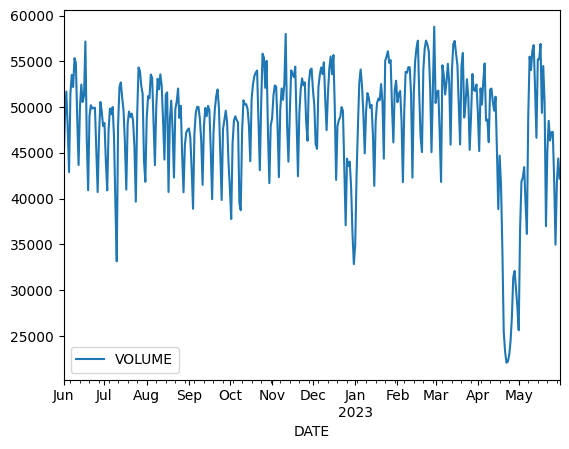

In [218]:
df.plot(y='VOLUME')

**Detecting Sesonality and Trend**

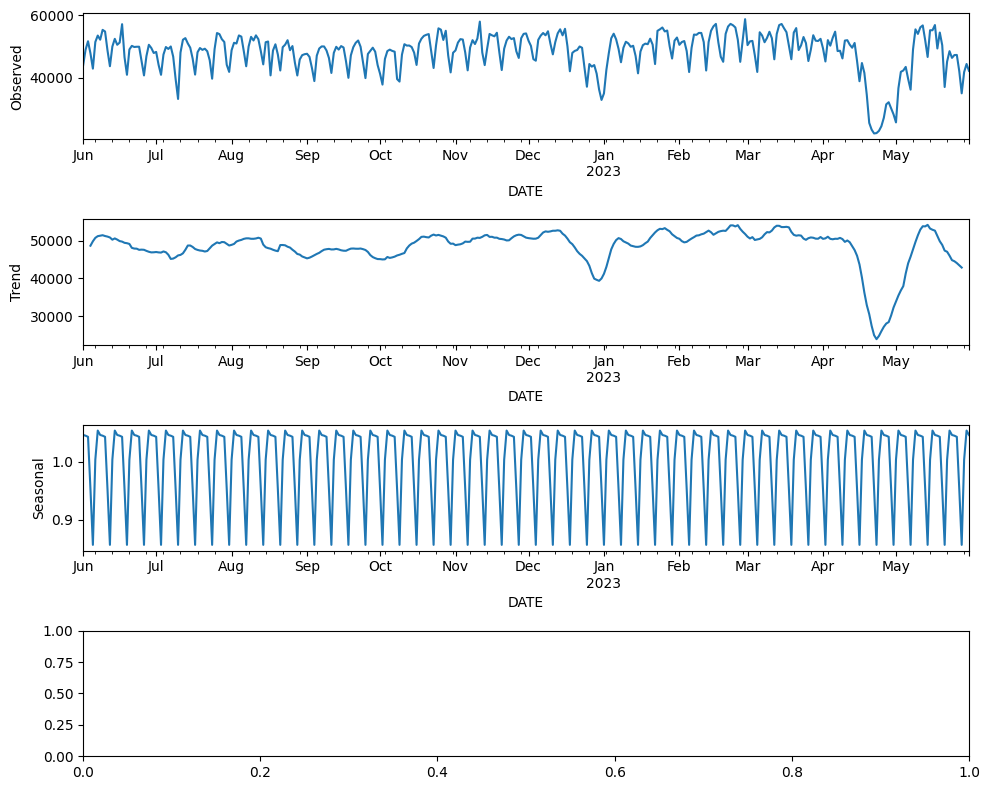

In [197]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df, model='multiplicative')  # Use 'multiplicative' for non linear trend

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')


plt.tight_layout()
plt.show()

C:\Users\rizki\AppData\Local\Temp\ipykernel_13596\3173715003.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  january_2023 = df['2023/01']


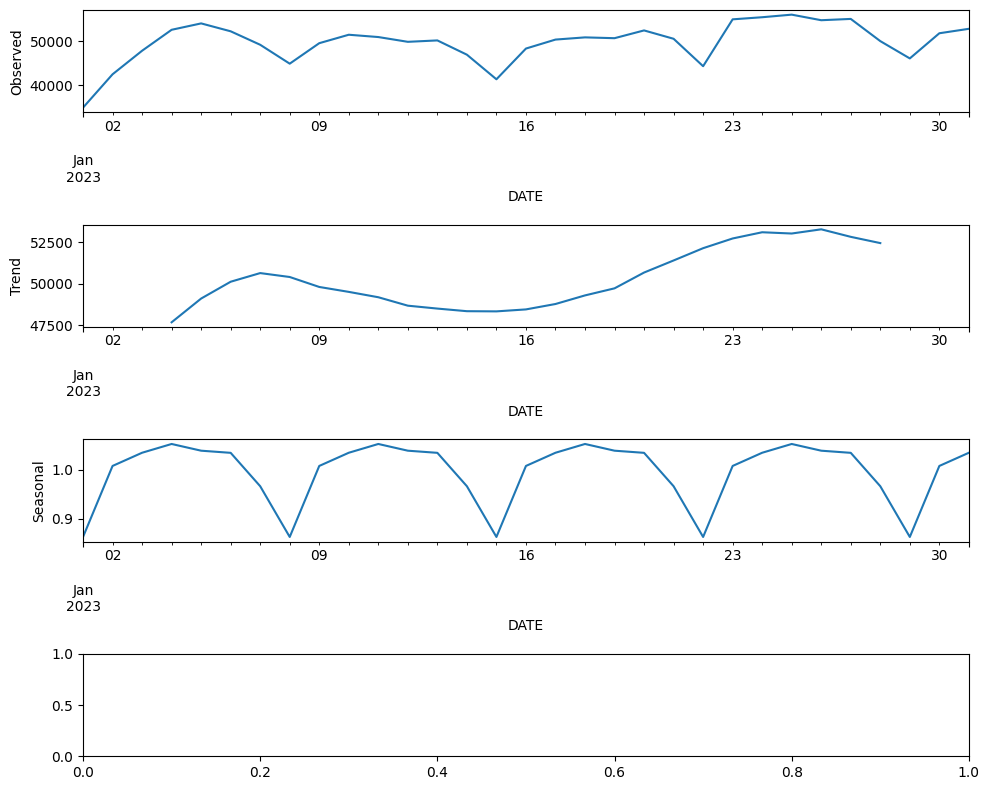

In [144]:
# Filter data for January 2023
january_2023 = df['2023/01']

# Perform seasonal decomposition
result = seasonal_decompose(january_2023, model='multiplicative')  # Use 'multiplicative' for non-linear trend

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')

plt.tight_layout()
plt.show()

**Check Stationary of Data**

In [222]:
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a variable called 'data'
result = adfuller(df)

# Extracting the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Printing the test statistic and p-value
print("Test Statistic:", test_statistic)
print("p-value:", p_value)

# Hypothesis testing
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Null hypothesis rejected. The data is stationary.")
else:
    print("Failed to reject the null hypothesis. The data is non-stationary.")

Test Statistic: -4.162734179889258
p-value: 0.0007614247656825241
Null hypothesis rejected. The data is stationary.


In [221]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_stat, p_value, lags, critical_values = kpss(df)

# Define the significance level
alpha = 0.05

# Print the test statistic, p-value, and critical values
print('KPSS Statistic:', kpss_stat)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Perform the hypothesis test
if p_value < alpha:
    print('Reject the null hypothesis.')
    print('The time series is non-stationary.')
else:
    print('Fail to reject the null hypothesis.')
    print('The time series is stationary.')

KPSS Statistic: 0.17959183950724988
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Fail to reject the null hypothesis.
The time series is stationary.


c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### ACF & PACF

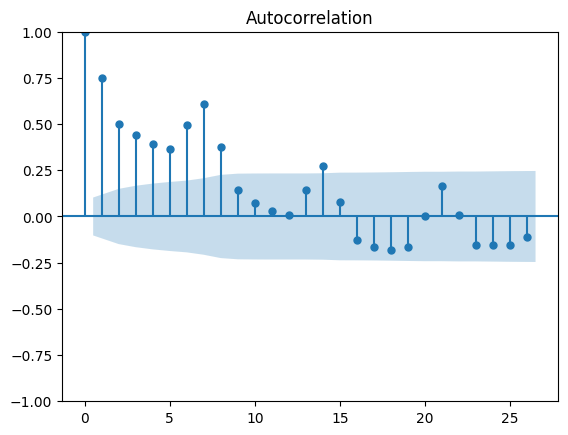

c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


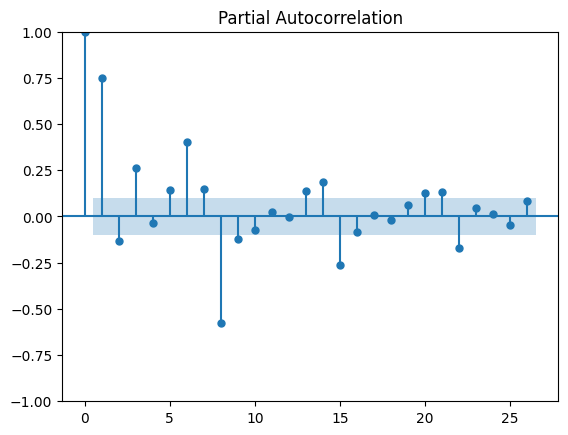

In [225]:
from statsmodels.graphics import tsaplots
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt


#plot autocorrelation function
fig = tsaplots.plot_acf(df)
plt.show()

#plot partial autocorrelation function (FIX THE LAGS)
fig = tsaplots.plot_pacf(df)
plt.show()

In [ ]:
# from statsmodels.tsa.stattools import adfuller

# def adf_test(df):
#     dftest = adfuller(df, autolag = 'AIC')
#     print("1. ADF: ", dftest[0])
#     print("2. P-Value : ", dftest[2])
#     print("3. Num Of Lags :", dftest[2])
#     print("4. Num Of Observations Used For ADF Regression:",dftest[3])
#     print("5. Critcal Values : ")
#     for key, val in dftest[4].items():
#         print("\t",key, ": ", val)
# adf_test(df)

In [ ]:
df['DIFFERENCE'] = df['VOLUME'].diff()
df = df.dropna()
print(df)

In [ ]:
df_dif = pd.DataFrame(df)
df = df.drop('VOLUME', axis=1)
df = df.rename(columns={'DIFFERENCE': 'VOLUME'})
df

## **ARIMA**

In [ ]:
from pmdarima import auto_arima
arima_model = auto_arima(df, 
                           seasonal=False, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

arima_model.summary()

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=arima_model.order)
model=model.fit()
model.summary()


Uji Ljung-Box ARIMA

In [ ]:
from scipy.stats import chi2

arima_resd = arima_model.resid()


# Print the residuals
print("Residuals:")
print(arima_resd.head())

from statsmodels.stats.diagnostic import acorr_ljungbox

alpha = 0.05

p_arima = arima_model.order[0]
d_arima = arima_model.order[1]
q_arima = arima_model.order[2]
pq = p_arima+q_arima
pq

critical_value = chi2.ppf(1 - alpha, df)

ljungbox_arima = acorr_ljungbox(arima_resd, lags=[12, 24], return_df=True)
ljungbox_arima.insert(0, 'Df (K-k)', [9, 21])
critical_value = chi2.ppf(1 - alpha, ljungbox_arima['Df (K-k)'])
ljungbox_arima.insert(2, 'X^2 table', critical_value)
ljungbox_arima.index.name = 'Lag'
ljungbox_arima


In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['VOLUME'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Absolute Deviation (MAD)
mad = mean_absolute_error(test['VOLUME'], pred)
print("Mean Absolute Deviation (MAD):", mad)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['VOLUME'] - pred) / test['VOLUME'])) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['VOLUME'], pred)
print("Mean Squared Error (MSE):", mse)

## **SARIMA**

SARIMA Model Not Fix

In [ ]:
from pmdarima import auto_arima
sarima_model_1 = auto_arima(df,
                          m=7, trace=True, 
                           error_action='ignore', seasonal=True, 
                           suppress_warnings=True, 
                           stepwise=True)

sarima_model_1.summary()

In [166]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # Use 80% of the data for training
train = df.iloc[:train_size]
test = df.iloc[train_size:]
print(df.shape)
print(train.shape,test.shape)

(365, 1)
(292, 1) (73, 1)


In [185]:
from pmdarima import auto_arima
sarima_model = auto_arima(df,max_p=3,
                          m=7, trace=True, 
                           error_action='ignore', seasonal=True, 
                           suppress_warnings=True, 
                           stepwise=True)

sarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=7428.236, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=7010.862, Time=0.49 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=7073.368, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=8916.563, Time=3.96 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=7129.941, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=7012.861, Time=1.76 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=7024.787, Time=0.44 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=6975.614, Time=2.41 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=4.10 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=6989.780, Time=2.52 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=7304.113, Time=1.86 sec
 ARIMA(2,0,0)(2,0,1)[7] intercept   : AIC=6978.866, Time=2.98 sec
 ARIMA(1,0,1)(2,0,1)[7] intercept   : AIC=6971.7

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(3, 0, 2)x(2, 0, [], 7)   Log Likelihood               -3451.563
Date:                            Sat, 01 Jul 2023   AIC                           6921.127
Time:                                    02:30:41   BIC                           6956.226
Sample:                                06-01-2022   HQIC                          6935.076
                                     - 05-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7969.8809   3493.547      2.281      0.023    1122.654    1.48e+04
ar.L1         -0.9543      0.097     -9.791      0.000      -1.145      -0.763
ar.L2          0.5635      0.076      7.415      0.000       0.415       0.712
ar.L3          0.7122      0.105      6.766      0.000       0.506       0.919
ma.L1          1.8467      0.071     25.951      0.000       1.707       1.986
ma.L2          0.9749      0.070     13.855      0.000       0.837       1.113
ar.S.L7        0.4607      0.102      4.529      0.000       0.261       0.660
ar.S.L14       0.2973      0.100      2.976      0.003       0.102       0.493
sigma2      1.543e+07      0.453   3.41e+07      0.000    1.54e+07    1.54e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               168.17
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+23. Standard errors may be unstable.
"""

In [186]:
from scipy.stats import chi2

sarima_resd = sarima_model.resid()


# Print the residuals
print("Residuals:")
print(sarima_resd.head())

from statsmodels.stats.diagnostic import acorr_ljungbox

alpha = 0.05

critical_value = chi2.ppf(1 - alpha, df)

ljungbox_arima = acorr_ljungbox(arima_resd, lags=[12, 24, 36, 48], return_df=True)
ljungbox_arima.insert(0, 'Df (K-k)', [7, 19, 31, 43])
critical_value = chi2.ppf(1 - alpha, ljungbox_arima['Df (K-k)'])
ljungbox_arima.insert(2, 'X^2 table', critical_value)
ljungbox_arima.index.name = 'Lag'
ljungbox_arima


Residuals:
DATE
2022-06-01   -4,528.43
2022-06-02    4,489.50
2022-06-03    2,583.82
2022-06-04   -2,661.11
2022-06-05   -3,925.95
dtype: float64


,Df (K-k),lb_stat,X^2 table,lb_pvalue
Lag,,,,
12,7,18.47,14.07,0.10
24,19,49.57,30.14,0.00
36,31,68.13,44.99,0.00
48,43,77.68,59.30,0.00


In [228]:
from scipy.stats import chi2

sarima_resd = sarima_model.resid()


# Print the residuals
print("Residuals:")
print(sarima_resd.head())

from statsmodels.stats.diagnostic import acorr_ljungbox

alpha = 0.05

critical_value = chi2.ppf(1 - alpha, df)

ljungbox_arima = acorr_ljungbox(sarima_resd, lags=[5, 24, 36, 48], return_df=True)
ljungbox_arima


Residuals:
DATE
2022-06-01   -4,528.43
2022-06-02    4,489.50
2022-06-03    2,583.82
2022-06-04   -2,661.11
2022-06-05   -3,925.95
dtype: float64


,lb_stat,lb_pvalue
5,9.67,0.09
24,49.57,0.00
36,68.13,0.00
48,77.68,0.00


In [148]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # Use 80% of the data for training
train = df.iloc[:train_size]
test = df.iloc[train_size:]
print(train.shape,test.shape)

(292, 1) (73, 1)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train,order=sarima_model.order,
              seasonal_order=sarima_model.seasonal_order, exog=None)
model=model.fit()
model.summary()

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('SARIMA Predictions')


# Plotting the train and test data
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, pred, label='Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Training and Testing Data SARIMA')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Absolute Deviation (MAD)
mad = mean_absolute_error(test['VOLUME'], pred)
print("Mean Absolute Deviation (MAD):", mad)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['VOLUME'] - pred) / test['VOLUME'])) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['VOLUME'], pred)
print("Mean Squared Error (MSE):", mse)

Forecast SARIMA

In [189]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(df,order=sarima_model.order,
              seasonal_order=sarima_model.seasonal_order, exog=None)
model=model.fit()
model.summary()

c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             VOLUME   No. Observations:                  365
Model:             SARIMAX(3, 0, 2)x(2, 0, [], 7)   Log Likelihood               -3463.133
Date:                            Sat, 01 Jul 2023   AIC                           6942.265
Time:                                    02:50:08   BIC                           6973.465
Sample:                                06-01-2022   HQIC                          6954.664
                                     - 05-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9475      4.550      0.208      0.835      -7.970       9.865
ar.L2          1.0000      9.118      0.110      0.913     -16.871      18.870
ar.L3         -0.9475      4.555     -0.208      0.835      -9.875       7.980
ma.L1      -3.585e-05      6.094  -5.88e-06      1.000     -11.945      11.945
ma.L2         -1.0000      4.840     -0.207      0.836     -10.487       8.487
ar.S.L7        0.4447      0.082      5.435      0.000       0.284       0.605
ar.S.L14       0.4090      0.088      4.665      0.000       0.237       0.581
sigma2      1.579e+07   8.12e-08   1.94e+14      0.000    1.58e+07    1.58e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):               162.12
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.87e+30. Standard errors may be unstable.
"""

In [149]:
df.shape

(365, 1)

In [188]:
sarima_model.predict(start=364, end=380)

2023-06-01   42,593.13
2023-06-02   44,782.89
2023-06-03   42,114.30
2023-06-04   35,900.51
2023-06-05   41,457.26
2023-06-06   44,926.89
2023-06-07   42,794.83
2023-06-08   44,417.99
2023-06-09   44,966.98
2023-06-10   42,956.97
Freq: D, dtype: float64

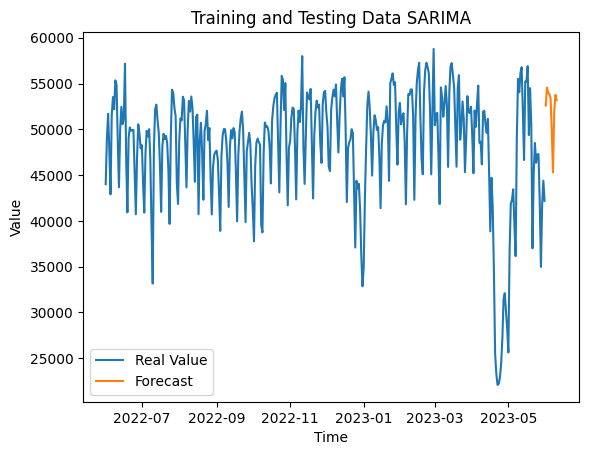

In [173]:
sarima_ds = sarima_model.predict(n_period=100)

# Plotting the train and test data
plt.plot(df.index, df, label='Real Value')
plt.plot(sarima_forecast.index, sarima_ds, label='Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Training and Testing Data SARIMA')
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import Holt

# Fitting Holt's Exponential Smoothing on the training data
model = Holt(train)
fitted_model = model.fit()

# Forecasting with Holt's Exponential Smoothing
forecast = fitted_model.forecast(len(test))

# Calculating Mean Absolute Deviation (MAD)
mad = mean_absolute_error(test['VOLUME'], forecast)
print("Mean Absolute Deviation (MAD):", mad)

# Calculating Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['VOLUME'] - forecast) / test['VOLUME'])) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(test['VOLUME'], forecast)
print("Mean Squared Error (MSE):", mse)

In [ ]:
from statsmodels.tsa.holtwinters import Holt
# Fitting Holt's Exponential Smoothing on the training data
model = Holt(train)
fitted_model = model.fit()

# Forecasting with Holt's Exponential Smoothing
forecast = fitted_model.forecast(len(test))

# Plotting the train and test data
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Training and Testing Data')
plt.show()

TESTTT

In [210]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(df,order=(1,1,3),
              seasonal_order=(1,1,3,7), exog=None)
model=model.fit()
model.summary()

c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA para

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            VOLUME   No. Observations:                  365
Model:             SARIMAX(1, 1, 3)x(1, 1, 3, 7)   Log Likelihood               -3332.125
Date:                           Sat, 01 Jul 2023   AIC                           6682.249
Time:                                   03:16:18   BIC                           6717.149
Sample:                               06-01-2022   HQIC                          6696.130
                                    - 05-31-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9906      0.038     26.101      0.000       0.916       1.065
ma.L1         -1.0605      0.051    -20.706      0.000      -1.161      -0.960
ma.L2          0.0418      0.064      0.653      0.514      -0.084       0.167
ma.L3          0.0407      0.047      0.861      0.389      -0.052       0.133
ar.S.L7       -0.9602      0.117     -8.184      0.000      -1.190      -0.730
ma.S.L7        0.1904      0.123      1.544      0.123      -0.051       0.432
ma.S.L14      -0.9506      0.112     -8.513      0.000      -1.169      -0.732
ma.S.L21      -0.1919      0.048     -4.040      0.000      -0.285      -0.099
sigma2      7.258e+06   1.45e-08      5e+14      0.000    7.26e+06    7.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               113.36
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.47
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.86e+31. Standard errors may be unstable.
"""